In [1]:
import numpy as np
import matplotlib.pyplot as plt

def beta_pdf(x, alpha, beta):
    return (x**(alpha-1) * (1-x)**(beta-1) * np.math.gamma(alpha+beta) /
            (np.math.gamma(alpha) * np.math.gamma(beta)))


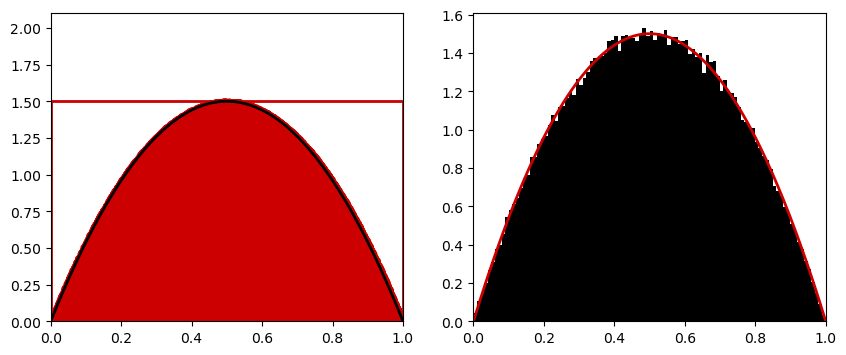

In [ ]:
alpha = 2
beta = 2
p_star = 1.5

rng = np.random.default_rng(5)

xx = np.linspace(0, 1, 1000)

n = 300000

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# for demonstration purposes, we do this in a for loop
# this can be done all at once

acc_samples = np.array([])
acc_u = np.array([])
# note that we do not have to store uniform samples
# this is again for demonstration of the FTS.

for i in range(n):
    x = rng.uniform(0, 1)
    u = rng.uniform(0, p_star)

    if u <= beta_pdf(x, alpha, beta):
        acc_u = np.append(acc_u, u)
        acc_samples = np.append(acc_samples, x)

axs[0].plot(xx, beta_pdf(xx, alpha, beta), color='k', linewidth=2)
axs[0].add_patch(plt.Rectangle((0, 0), 1, p_star, color=[0.8, 0, 0], fill=False, lw=2))
axs[0].scatter(acc_samples, acc_u, color=[0.8, 0, 0], s=12)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 2.1)
axs[1].cla()
axs[1].plot(xx, beta_pdf(xx, alpha, beta), color=[0.8, 0, 0], linewidth=2)
axs[1].hist(acc_samples, bins=100, density=True, color='k')
axs[1].set_xlim(0, 1)
plt.show()